<a href="https://colab.research.google.com/github/raviiraj13/100_days_of_Data_Science/blob/main/Handling_Missing_value_numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# from sklearn.compose import ColumnTransformer



# numeric_feature = ['Age','marks']
# categorical_feature = ['Gender','City']

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num',StandardScaler(),numeric_feature),
#         ('cat',OnehotEncoder(handle_unknown="ignore"),categorical_feature)
#     ]
# )


# X_trasnfromed = preprocessor.fit_transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)




############################################


In [ ]:
#fit and transfrom ----->>>>> manual

# preprocessor.fit(X_train)
# X_train_t = preprocessor.transform(X_train)
# X_test_t  = preprocessor.transform(X_test)



#fit and tranform ------>>>>>>> automatic
# X_train_t = preprocessor.fit_transform(X_train)
# X_test_t  = preprocessor.transform(X_test)


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day36-imputing-numerical-data/titanic_toy.csv')

In [3]:
df.sample(5)

,Age,Fare,Family,Survived
156,16.0,7.7333,0,1
474,22.0,9.8375,0,0
35,42.0,52.0000,1,0
480,9.0,46.9000,7,0
473,23.0,13.7917,0,1


#using Sklearn

In [6]:
X=df.drop(columns=['Survived'])
y=df['Survived']

#

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
X_train.isna().mean()*100

,0
Age,20.786517
Fare,5.056180
Family,0.000000


In [13]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

transf = ColumnTransformer(transformers=[
    ('trf1',SimpleImputer(strategy='median'),['Age']),
    ('trf2',SimpleImputer(strategy='mean'),['Fare'])
], remainder='passthrough')

X_train_t = transf.fit_transform(X_train)
X_test_t = transf.transform(X_test)


In [17]:
X_train_t = pd.DataFrame(X_train_t,columns=X_train.columns)
X_train_t = pd.DataFrame(X_test_t,columns=X_test.columns)

In [32]:
X_train.isna().mean()*100,X_train_t.isna().mean()*100

(Age       20.786517
 Fare       5.056180
 Family     0.000000
 dtype: float64,
 Age       0.0
 Fare      0.0
 Family    0.0
 dtype: float64)

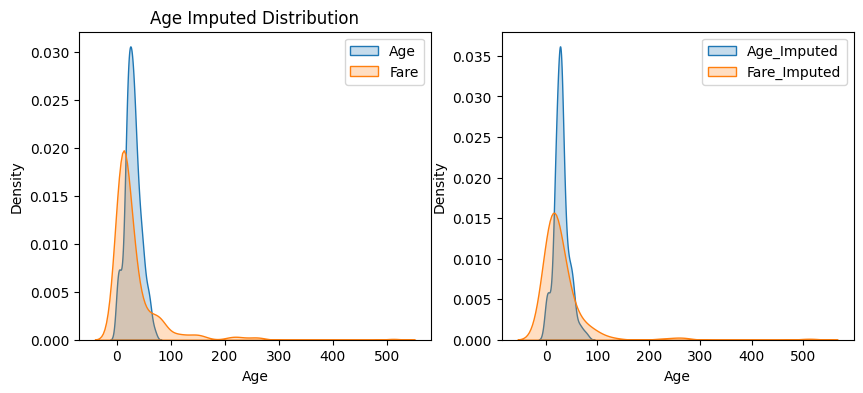

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].set_title('Age Distribution')
axes[0].set_title('Age Imputed Distribution')

sns.kdeplot(data=X_train,x='Age',ax=axes[0],fill=True)
sns.kdeplot(data=X_train,x='Fare',ax=axes[0],fill='True')
axes[0].legend(['Age','Fare'])
sns.kdeplot(data=X_train_t,x='Age',ax=axes[1],fill='True')
sns.kdeplot(data=X_train_t,x='Fare',ax=axes[1],fill='True')
axes[1].legend(['Age_Imputed','Fare_Imputed'])
plt.show()



In [34]:
X_train_t.sample(5)

,Age,Fare,Family
123,25.0,13.000000,0.0
138,39.0,32.617597,0.0
142,44.0,26.000000,1.0
86,38.0,8.662500,0.0
74,26.0,7.854200,0.0


In [35]:
X_train['Family'].value_counts()

,count
Family,
0,429
1,121
2,87
3,22
5,20
4,12
6,10
10,6
7,5


#Arbitary Value Imputation

In [ ]:
#just do this every thing remains same

# imputer1 = SimpleImputer(strategy='constant',fill_value=99)
# imputer2 = SimpleImputer(strategy='constant',fill_value=999)